### 2.3.1 サンプルデータセット
- forge データセット
  - 合成した(でっち上げた)2クラス分類データセット
  - 第1特徴量をx軸, 第２特徴量をy軸にプロット
  - 2つの特徴量を持つ26のデータポイントで構成されている。

/home/gpuadmin/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
X.shape:(26, 2)


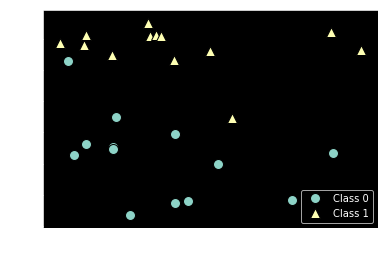

In [1]:
%matplotlib inline
import mglearn
import matplotlib.pyplot as plt

# データセットの生成
X,y = mglearn.datasets.make_forge()
# データセットをプロット
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shape:{}'.format(X.shape))

- wave データセット
    - 回帰アルゴリズムを紹介するのに使う
    - 入力として1つの特徴量と、モデルの対象となる連続値のターゲット変数（**反応(response)**）を持つ。
    - 特徴量をx軸に, 回帰のターゲット(出力)をy軸に取っている。 

Text(0, 0.5, 'Target')

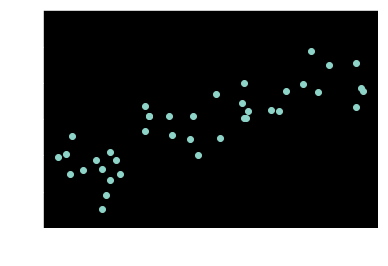

In [2]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

forge, waveのような低次元のデータセットを使うのは、可視化が容易だからである。

少ない特徴量を持つデータセット(低次元データセット)に対する直観が、多数の特徴量を持つデータセット(高次元データセット)に対しても通用するとは限らない。

⇒ **次元の呪い**

※[次元の呪い、あるいは「サクサクメロンパン問題」](https://windfall.hatenablog.com/entry/2015/07/02/084623)

合成データを補うために、scikit-learnに含まれている2つの実問題からとっったデータセットを用いる。

- ウィスコンシン乳癌データセット
    - 良性(benign), 悪性(malignant)のラベルがついている。
    - 組織の測定結果から悪性かどうかを予測するように学習することがタスク
    - 30の特徴量を持つ569のデータポイントで構成されている。
    - 569のデータポイントのうち, 212が悪性で357が良性

In [6]:
from sklearn.datasets import load_breast_cancer
import numpy as np
cancer = load_breast_cancer()
print('cancer.keys():\n{}'.format(cancer.keys()))
print('Shape of cancer data:{}'.format(cancer.data.shape))
print('Sample counts per class:\n{}'.format({n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
# 個々の特徴量の意味はfeature_names属性に格納されている。
print('Feature names:\n{}'.format(cancer.feature_names))

cancer.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape of cancer data:(569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


- boston_housingデータセット
    - 実世界の回帰データセット
    - 1970年代のボストン近郊の住宅地の住宅価格の中央値を, 犯罪率, チャールズ川からの距離, 高速道路への利便性などから予測するタスク
    - 13の特徴量をもつ506のデータポイントが含まれる。

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print('Data shape:{}'.format(boston.data.shape))
# 特徴量間の積(交互作用)：犯罪率と高速道路への利便性を特徴としてみるのではなく、積も特徴量とする。
# 導出された特徴量を含めることを特徴量エンジニアリング(feature engineering)と呼ぶ
X, y = mglearn.datasets.load_extended_boston()
print('X.shape:{}'.format(X.shape))

Data shape:(506, 13)
X.shape:(506, 104)
